In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('Social_Network_Ads.csv',usecols=['Gender','Age','EstimatedSalary','Purchased'])
df.sample(4)

,Gender,Age,EstimatedSalary,Purchased
209,Female,46,22000,0
383,Male,49,28000,1
370,Female,60,46000,1
290,Male,39,134000,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [49]:
df.shape

(400, 4)

In [50]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [51]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [52]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [53]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

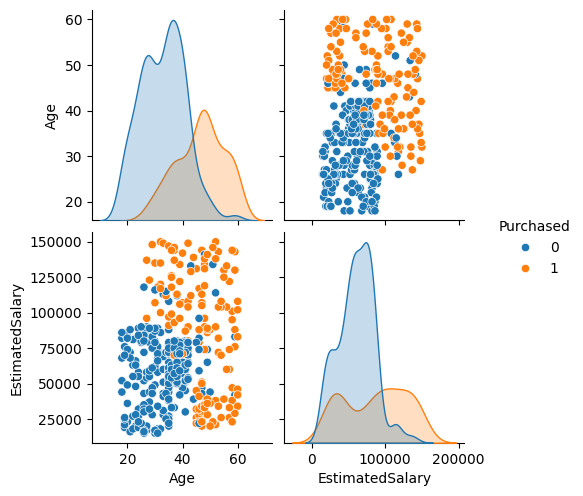

In [54]:
sns.pairplot(data=df,hue='Purchased')

In [55]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

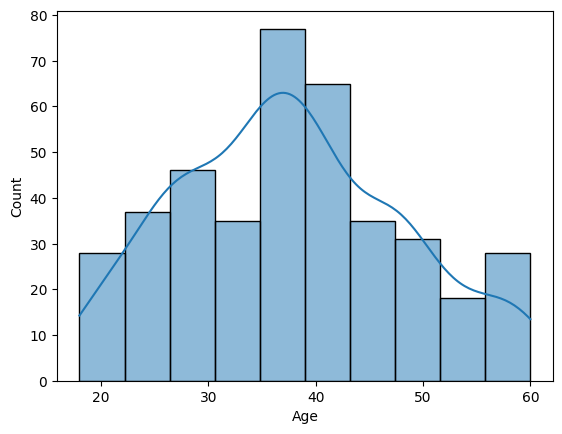

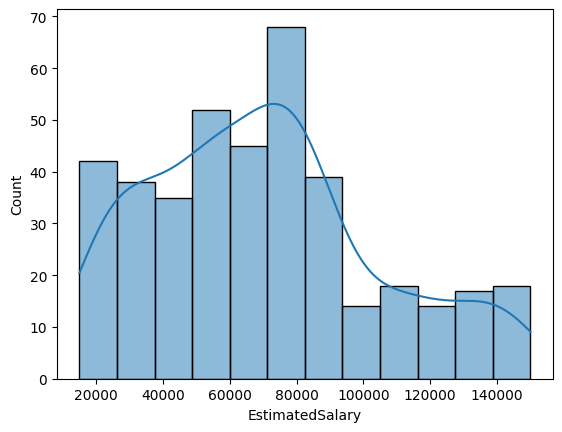

In [56]:
for i in X.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

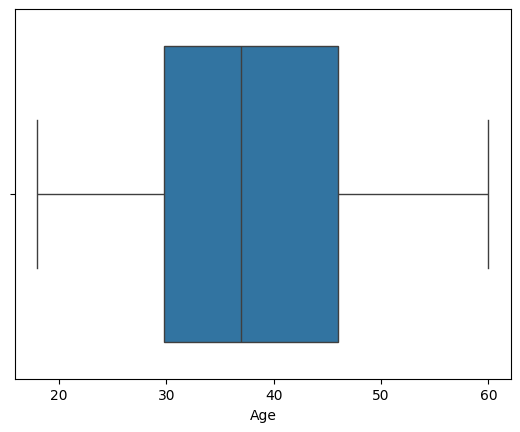

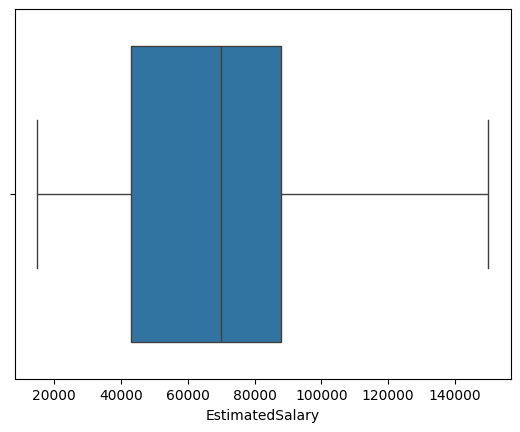

In [57]:
for i in X.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [58]:
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [60]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['Gender']=le.fit_transform(X['Gender'])

In [72]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [73]:
X_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [74]:
y_train

3      0
18     1
202    1
250    0
274    1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 320, dtype: int64

In [76]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [77]:
model.fit(X_train,y_train)


,priors,None
,var_smoothing,1e-09


In [80]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
class_repo=classification_report(y_test,y_pred)
conf_mat=confusion_matrix(y_test,y_pred)

In [83]:
conf_mat

array([[50,  2],
       [ 3, 25]], dtype=int64)

In [84]:
class_repo

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95        52\n           1       0.93      0.89      0.91        28\n\n    accuracy                           0.94        80\n   macro avg       0.93      0.93      0.93        80\nweighted avg       0.94      0.94      0.94        80\n'

In [85]:
accuracy

0.9375